# 0. SOME PRELIMINARIES 

In [1]:
# Import some libraries
import matplotlib.pyplot as plt 
# For plotting data
import numpy as np              
# For Panda dataframes. A dataframe is a matrix-like structure, 
# similar to R dataframes  
import pandas as pd

import os
os.getcwd()

'/home/gio/Dropbox/bd intelligence'

The "wind_pickle" file contains data in a binary format called "Pickle". Pickle data loads faster than text data.

In [2]:
data = pd.read_pickle('wind_pickle')
data.head()

energy  steps  year  month  day  hour     p54.162.1     p54.162.2  \
0   402.71      0  2005      1    2    18  2.534970e+06  2.526864e+06   
1   696.80      6  2005      1    3     0  2.537369e+06  2.529277e+06   
2  1591.15     12  2005      1    3     6  2.533727e+06  2.525703e+06   
3  1338.62     18  2005      1    3    12  2.534491e+06  2.526548e+06   
4   562.50      0  2005      1    3    18  2.529543e+06  2.521623e+06   

      p54.162.3     p54.162.4    ...      v100.16   v100.17   v100.18  \
0  2.518754e+06  2.510648e+06    ...    -4.683596 -4.545396 -4.407196   
1  2.521184e+06  2.513088e+06    ...    -3.397886 -3.257192 -3.115998   
2  2.517678e+06  2.509654e+06    ...    -1.454105 -1.296447 -1.138290   
3  2.518609e+06  2.510670e+06    ...     1.255015  1.370265  1.485515   
4  2.513702e+06  2.505782e+06    ...     1.939031  2.023847  2.108663   

    v100.19   v100.20   v100.21   v100.22   v100.23   v100.24   v100.25  
0 -4.268996 -4.131295 -4.669626 -4.528932 -4.388736 -4.248540 -4.107846  
1 -2.975304 -2.834609 -3.396390 -3.254198 -3.112506 -2.970314 -2.828622  
2 -0.980134 -0.822476 -1.459094 -1.302933 -1.147271 -0.991110 -0.834949  
3  1.600765  1.716015  1.210612  1.319376  1.428140  1.536405  1.645169  
4  2.193977  2.278793  1.873673  1.953000  2.031829  2.111157  2.189986  

[5 rows x 556 columns]

You can visualize the attributes in the dataset. Very important, the output attribute (i.e. the value to be predicted, **energy**, is the first attribute). **Steps** represents the hours in advance of the forecast. We will not use this variable here.

In [3]:
# The dataset contains 5937 instances and 556 attributes (including 
# the outcome to be predicted)
print data.shape
data.columns.values.tolist()

(5937, 556)


['energy',
 'steps',
 'year',
 'month',
 'day',
 'hour',
 'p54.162.1',
 'p54.162.2',
 'p54.162.3',
 'p54.162.4',
 'p54.162.5',
 'p54.162.6',
 'p54.162.7',
 'p54.162.8',
 'p54.162.9',
 'p54.162.10',
 'p54.162.11',
 'p54.162.12',
 'p54.162.13',
 'p54.162.14',
 'p54.162.15',
 'p54.162.16',
 'p54.162.17',
 'p54.162.18',
 'p54.162.19',
 'p54.162.20',
 'p54.162.21',
 'p54.162.22',
 'p54.162.23',
 'p54.162.24',
 'p54.162.25',
 'p55.162.1',
 'p55.162.2',
 'p55.162.3',
 'p55.162.4',
 'p55.162.5',
 'p55.162.6',
 'p55.162.7',
 'p55.162.8',
 'p55.162.9',
 'p55.162.10',
 'p55.162.11',
 'p55.162.12',
 'p55.162.13',
 'p55.162.14',
 'p55.162.15',
 'p55.162.16',
 'p55.162.17',
 'p55.162.18',
 'p55.162.19',
 'p55.162.20',
 'p55.162.21',
 'p55.162.22',
 'p55.162.23',
 'p55.162.24',
 'p55.162.25',
 'cape.1',
 'cape.2',
 'cape.3',
 'cape.4',
 'cape.5',
 'cape.6',
 'cape.7',
 'cape.8',
 'cape.9',
 'cape.10',
 'cape.11',
 'cape.12',
 'cape.13',
 'cape.14',
 'cape.15',
 'cape.16',
 'cape.17',
 'cape.18',
 'ca

Below, data is going to be separated in train, validation, and test. Given that the use of Pandas dataframes is quite advanced, and doing this for you:

In [4]:
indicesTrain = (np.where(data.year<=2006))[0]
indicesVal = (np.where((data.year==2007) | (data.year==2008)))[0]
indicesTest = (np.where(data.year>=2009))[0]

Beware!, **indicesTrain** does not contain the training data, but the *indices* of the training data. For instance, the following cell means that training data is made of instance number 0, instance number 1, ..., up to instance number 2527. This will be important later.

In [5]:
print(indicesTrain,
indicesVal,
indicesTest)

(array([   0,    1,    2, ..., 2525, 2526, 2527]), array([2528, 2529, 2530, ..., 3824, 3825, 3826]), array([3827, 3828, 3829, ..., 5934, 5935, 5936]))


Now, we are going to transform **data**, which is a Pandas dataframe, to **ava**, which is a NumPy matrix. The reason is that Scikit-learn uses NumPy matrices, not Panda dataframes.

In [6]:
ava = data.as_matrix()
print(ava[:,6])

[ 2534969.63189538  2537368.8349839   2533727.10675538 ...,
  2457295.99668869  2464014.6689912   2468054.00526452]


Now, **ava** is going to be decomposed into inputs **X** and outputs **y**. And then, into training, validation, and test. For instance, **Xava** and **yava** contain the input attributes, and the output attribute (**energy**) of the whole dataset. Please, ask yourself why the inputs use "6:" and the output use "0". **Xtrain** and **ytrain** are the same, but for the training dataset.

In [7]:
#The input matrices are filled from the 6th column because 'steps','month','day','hour' aren't reliable data to build our decision
#Same reasoning to build the outputs y: we are interested in the amount of energy producted, which actually is written in column 0 of ava
Xava = ava[:,6:]; yava = ava[:,0]
Xtrain = ava[indicesTrain,6:]; ytrain = ava[indicesTrain,0]
Xval = ava[indicesVal,6:]; yval = ava[indicesVal,0]
Xtest = ava[indicesTest,6:]; ytest = ava[indicesTest,0]
print(Xtrain.shape, Xval.shape,Xtest.shape)

((2528, 550), (1299, 550), (2110, 550))


The following cell defines function **mae** (Mean Absolute Error), that we will use later to measure the accuracy of models.

In [8]:
def mae(yval_pred, yval):
  val_mae = metrics.mean_absolute_error(yval_pred, yval)
  return(val_mae)

The following cell trains KNN with (Xtrain, ytrain) and evaluates it with (Xval, yval).

In [9]:
from sklearn import metrics
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')

%time _ = knn.fit(Xtrain, ytrain)
yval_pred = knn.predict(Xval)

print "MAE for KNN with K=5 is {}".format(mae(yval_pred, yval))

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 30.2 ms
MAE for KNN with K=5 is 486.911414935


In [10]:
# In case you need help for KNN
#help('sklearn.neighbors.KNeighborsRegressor')

The following cell, does hyper-parameter tuning for parameter K (n_neighbors), from 1 to 4 by 1. Please, notice that with **partitions = [(indicesTrain, indicesVal)]** we are telling **gridSearch** to use the training dataset for training the different models with the different parameters, and the validation dataset for testing. Notice that this is different to other notebooks, where crossvalidation was used for this purpose. 

In [11]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

np.random.seed(0)

param_grid = {'n_neighbors': range(1,4,1)}

partitions = [(indicesTrain, indicesVal)]
clf = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=partitions , verbose=1)
%time _ = clf.fit(Xava,yava)

Fitting 1 folds for each of 3 candidates, totalling 3 fits


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CPU times: user 964 ms, sys: 8 ms, total: 972 ms
Wall time: 970 ms


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished


Next, we show the best K parameter and the MAE of the final model built with the best parameter.

In [12]:
print "Best K: {} and MAE for best K: {}".format(clf.best_params_, -clf.best_score_)

Best K: {'n_neighbors': 3} and MAE for best K: 503.711691044


# 1. HOW LONG DOES IT TAKE?

It is always a good idea to have some estimation of how long your machine learning algorithm is going to take. In the next two cells, try to estimate how many seconds KNN (with K=3) does it take, with only **100 instances**. With 6000 instances, it will take approximately 60 times that number. You can use **%time** for timing, as in previous cells.

In [13]:
#<WRITE CODE HERE FOR TIMING KNN>

Xava_100 = Xava[:100]; yava_100 = yava[:100]
print(Xava.shape,Xava_100.shape, yava.shape, yava_100.shape)

knn = neighbors.KNeighborsRegressor(n_neighbors=3, n_jobs = -1)

%time _ = knn.fit(Xava_100, yava_100)

((5937, 550), (100, 550), (5937,), (100,))
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.17 ms


Please, do the same for Decision trees with default parameters

In [14]:
#<WRITE CODE HERE FOR TIMING Decision Trees>
from sklearn import tree

clf = tree.DecisionTreeRegressor()

%time _ = clf.fit(Xava_100, yava_100)

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 28.7 ms


# 2. MODEL SELECTION AND HYPER-PARAMETER TUNING

Train a KNN model with default parameters

In [15]:
#<WRITE CODE HERE FOR KNN>
knn = neighbors.KNeighborsRegressor()

knn.fit(Xtrain, ytrain)

yval_pred = knn.predict(Xval)

print "MAE for KNN with default parameters is {}".format(mae(yval_pred, yval))

MAE for KNN with default parameters is 486.911414935


Do hyper-parameter tuning for KNN. Can you improve results? Note: if **gridSearch** takes too long, you can use **Randomized Search** instead.

In [16]:
print'Grid Search'

# WARNING The distributions in scipy.stats prior to version scipy 0.16 do not allow specifying a random state.
# Instead, they use the global numpy random state, that can be seeded via np.random.seed or set using np.random.set_state.
# However, beginning scikit-learn 0.18, the sklearn.model_selection module sets the random state provided by the user.
# from http://scikit-learn.org/stable/modules/grid_search.html
# THUS

np.random.seed(0)

partitions = [(indicesTrain, indicesVal)]

param_grid = {'n_neighbors' : range(1,30,1),
 'algorithm' :('brute', 'ball_tree', 'kd_tree'),
 'metric' : ('euclidean', 'manhattan', 'chebyshev', 'minkowski'),
 'weights' : ('uniform', 'distance'),}

grid_clf = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid = param_grid,
                   scoring = 'neg_mean_absolute_error',
                   cv = partitions,
                   verbose = 1, n_jobs = -1) #use all the cores
# till now the GridSearch hasn't started: the computation begins as we define the matrices of data on which to apply the algorithm.
# we use the entire Xava and yava; how to partition them for train and test has been previously defined 
# through 'indicestrain' and 'indicesval' in the partitions variable.
grid_clf.fit(Xava, yava)

print "Best hyper-parameters are: {} they give a MAE of: {}".format(grid_clf.best_params_, -grid_clf.best_score_)


Grid Search
Fitting 1 folds for each of 696 candidates, totalling 696 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min


Best hyper-parameters are: {'n_neighbors': 20, 'metric': 'manhattan', 'weights': 'distance', 'algorithm': 'ball_tree'} they give a MAE of: 468.489485874


[Parallel(n_jobs=-1)]: Done 696 out of 696 | elapsed:  3.4min finished


In [17]:
from scipy.stats import randint as sp_randint
print'Randomized Search'

np.random.seed(0)

partitions = [(indicesTrain, indicesVal)]

param_dist = {'n_neighbors' : sp_randint(1,30),
    'metric' : ('euclidean', 'manhattan', 'chebyshev', 'minkowski'),
    'algorithm' : ('ball_tree', 'kd_tree', 'brute'),
    'weights' : ('distance', 'uniform')}

n_iter_search = 29 #Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
rs_clf = RandomizedSearchCV(neighbors.KNeighborsRegressor(), 
                                   param_distributions=param_dist,
                                   scoring='neg_mean_absolute_error',
                                   cv=partitions ,
                                   n_jobs=-1, verbose=1,
                                   n_iter=n_iter_search)
#till now the RandomizedSearch hasn't started: the computation begins as we define the matrices of data on which to apply the algorithm.
#we use the entire Xava and yava; how to partition them for train and test has been previously defined 
#through 'indicestrain' and 'indicesval' in the partitions variable.
rs_clf.fit(Xava,yava)

print "Best hyper-parameters are: {} they give a MAE of: {}".format(rs_clf.best_params_, -rs_clf.best_score_)


Randomized Search
Fitting 1 folds for each of 29 candidates, totalling 29 fits
Best hyper-parameters are: {'n_neighbors': 22, 'metric': 'manhattan', 'weights': 'distance', 'algorithm': 'kd_tree'} they give a MAE of: 469.263673911


[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    6.6s finished


Train a decision tree for regression with default parameters

In [22]:
# WARNING -> Parameters of TreeDecisionRegressor : random_state = int, RandomState instance or None (optional -> default=None).
# If int, random_state is the seed used by the random number generator; if None, the random number generator is
# the RandomState instance used by np.random. Thus we need to seed the random state through:
# Thus
np.random.seed(0)

from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf.fit(Xtrain,ytrain)

yval_pred = clf.predict(Xval)


print "MAE for decision tree with default parameters is {0}".format(mae(yval_pred,yval))

MAE for decision tree with default parameters is 371.829430331


Do hyper-parameter tuning for Decision trees. Can you improve results?

In [30]:
#<WRITE CODE HERE FOR DECISION TREES>
from sklearn import tree

np.random.seed(0) #important

partitions = [(indicesTrain, indicesVal)]

param_grid = {'splitter' : ('best', 'random'),
             'max_features' : ('log2', 'sqrt', 'auto'),
             'max_depth' : range(1,20,1),
             'min_samples_split' : range(2,10,1),
             'min_samples_leaf' : range(1,20,1)
             }

grid_clf = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid = param_grid,
                   scoring = 'neg_mean_absolute_error',
                   cv = partitions,
                   verbose = 1, n_jobs = -1)

grid_clf.fit(Xava, yava)

print "Best hyper-parameters are: {} they give a MAE of: {}".format(grid_clf.best_params_, -grid_clf.best_score_)


Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1155 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1605 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2155 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2805 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3555 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4405 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 5355 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 6405 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 7555 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 8805 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 10155 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 11605 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 13155 tasks      | elapsed: 

Best hyper-parameters are: {'max_features': 'auto', 'min_samples_split': 6, 'splitter': 'random', 'max_depth': 13, 'min_samples_leaf': 14} they give a MAE of: 287.906653287


Train a Random Forest (RF) with default parameters. A RF is an ensemble technique based on Decision Trees, but instead of training just a single decision tree, it trains many of them and then computes the average of the outputs. Please, bear in mind that a RF with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [31]:
from sklearn.ensemble import RandomForestRegressor
# help('sklearn.ensemble.RandomForestRegressor')
# Again WARNING -> RandomForestRegressor parameters: random_state = int, RandomState instance or None, optional (default=None)
# If int, random_state is the seed used by the random number generator;
# if None, the random number generator is the RandomState instance used by np.random.

np.random.seed(0)

rf = RandomForestRegressor()

rf.fit(Xtrain,ytrain)

yval_pred = rf.predict(Xval)

print "MAE for Random Forest Regressor with default parameters is {}".format(mae(yval_pred, yval))

MAE for Random Forest Regressor with default parameters is 287.271919938


Do hyper-parameter tuning for Random Forests. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [32]:
#<WRITE CODE HERE FOR RANDOM FORESTS HYPER-PARAMETER TUNING>
from scipy.stats import randint as sp_randint

np.random.seed(0)

partitions = [(indicesTrain, indicesVal)]

param_dist = {'n_estimators' : sp_randint(25,175)}

n_iter_search = 15 #Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

rs_rf = RandomizedSearchCV(RandomForestRegressor(), 
                                   param_distributions=param_dist,
                                   scoring='neg_mean_absolute_error',
                                   cv=partitions ,
                                   n_jobs=-1, verbose=1,
                                   n_iter=n_iter_search)

rs_rf.fit(Xava,yava)

print "Best hyper-parameters are: {} they give a MAE of: {}".format(rs_rf.best_params_, -rs_rf.best_score_)

Fitting 1 folds for each of 15 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.0min finished


Best hyper-parameters are: {'n_estimators': 165} they give a MAE of: 275.923786969


Train a Gradient Tree Boosting (GB) with default parameters. A GB is also an ensemble technique based on Decision Trees. In this case, the second decision tree tries to fix the mistakes of the first decision tree. The third decision tree tries to fix the mistakes of the first two decision trees. An so on.

Please, bear in mind that a GB with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
# help('sklearn.ensemble.GradientBoostingRegressor')
# Again WARNING -> GradientBoostingRegressor parameters: random_state = int, RandomState instance or None, optional (default=None)
# If int, random_state is the seed used by the random number generator;
# if None, the random number generator is the RandomState instance used by np.random.
np.random.seed(0)

gb = GradientBoostingRegressor()

gb.fit(Xtrain, ytrain)

yval_pred = gb.predict(Xval)

print "MAE for Gradient Boosting with default parameters is {}".format(mae(yval_pred, yval))

MAE for Gradient Boosting with default parameters is 280.827324529


Do hyper-parameter tuning for Gradient Boosting. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [34]:
#<WRITE CODE HERE FOR GRADIENT BOOSTING HYPER-PARAMETER TUNING>

from scipy.stats import randint as sp_randint

np.random.seed(0)

partitions = [(indicesTrain, indicesVal)]

param_dist = {'n_estimators' : sp_randint(25,125)}

n_iter_search = 15 #Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

rs_gb = RandomizedSearchCV(GradientBoostingRegressor(), 
                                   param_distributions=param_dist,
                                   scoring='neg_mean_absolute_error',
                                   cv=partitions ,
                                   n_jobs=-1, verbose=1,
                                   n_iter=n_iter_search)

rs_gb.fit(Xava,yava)

print "Best hyper-parameters are: {} they give a MAE of: {}".format(rs_gb.best_params_, -rs_gb.best_score_)

Fitting 1 folds for each of 15 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


Best hyper-parameters are: {'n_estimators': 113} they give a MAE of: 279.699663985


At this point, you should know which model performs best, and what hyper-parameters to use. Please, evaluate that best performing model on the test set.

In [35]:
print 'The model which seems to perform best is RandomForestRegressor with the hyper-parameter n_estimators = 165 \nread #comments in the code'
# RandomizedSearch gave me a MAE of 275.923786969 before (see a few cells above).
# Given that for this RandomizedSearch we aren't using crossvalidation (for convenience), but training and valida-
# tion partition instead, I'd expect to obtain the same MAE doing the following:

# np.random.seed(0)

# rf = RandomForestRegressor(n_estimators=165)

# rf.fit(Xtrain,ytrain)

# yval_pred = rf.predict(Xval)

# print "MAE for Random Forest Regressor with the optimal hyper-parameters is {}".format(metrics.mean_absolute_error(yval, yval_pred))

# I obtain a MAE which is little different, but, as said by the professor, it could be because even if I set
# np.random.seed(0) in both cases, it could happen that the RandomizedSearch finds the best hyper-parameter
# when performing the second, third, fourth ,..., model and the random.seed has changed.

#####################################################################################################################
np.random.seed(0)

rf = RandomForestRegressor(n_estimators=165)

#I create a new training fold (basically merging the data which before were splitted in train and val)
new_index_train = (np.where(data.year<2009))[0]
new_Xtrain = ava[new_index_train,6:]
new_ytrain = ava[new_index_train,0]

rf.fit(new_Xtrain,new_ytrain)

ytest_pred = rf.predict(Xtest)

print "MAE for Random Forest Regressor with the optimal hyper-parameters (165 estimators) predicting on the test partition is {}".format(mae(ytest_pred, ytest))


The model which seems to perform best is RandomForestRegressor with the hyper-parameter n_estimators = 165 
read #comments in the code
MAE for Random Forest Regressor with the optimal hyper-parameters (165 estimators) predicting on the test partition is 284.496182996


# 3. ATTRIBUTE SELECTION

This section is more open-ended than the previous ones, and I offer less guidance. It is definitely harder, but you can always ask the teacher. 

You have to answer the following question: 

- "Are all 550 input attributes actually necessary in order to get a good model? Is it possible to have an accurate model that uses fewer than 550 variables? How many? Is it enough to have the attributes for the actual Sotavento location? (13th in the grid)"

In order to answer this question:

1) Go through the "Attribute Selection" ipython notebook, and understand the main ideas about **SelectKBest** and **Pipeline**.

2) Use **SelectKBest** and **Pipeline** (and whatever else you need) in order to find a subset of attributes that allows to build an accurate Decision Tree model. We are going to use here Decision Trees because they are faster (even if Random Forests or Gradient Boosting performed better in previous sections). Please, note that you cannot just copy/paste from the "Attribute Selection" notebook. You will have to think about how to use the main ideas from that notebook, and change whatever needs changing. 

3) Once you have decided which attributes should be used for the Decision Tree, evaluate the final model on the test dataset.


In [36]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, f_regression

0 (75, -753.53688132167974)
1 (76, -749.21346421992337)
2 (80, -748.67970174311608)
3 (85, -744.68734135065006)
4 (81, -744.20529412530061)
5 (77, -743.9621033358211)
6 (90, -741.34600458315742)
7 (86, -740.07992904758567)
8 (82, -738.7845027027239)
9 (78, -737.76864707024788)
10 (91, -736.63409172556339)
11 (87, -734.52984054435512)
12 (95, -734.14633693685187)
13 (83, -732.44041951535382)
14 (92, -730.98718014163626)
15 (79, -730.6639148472467)
16 (96, -729.45741826441713)
17 (88, -728.06169297203712)
18 (84, -725.17299793596112)
19 (93, -724.41427914390374)
20 (97, -723.84055863492358)
21 (89, -720.6774976730228)
22 (98, -717.31231235999428)
23 (94, -716.93257578654834)
24 (99, -709.8880931227435)
25 (419, -323.8415382355613)
26 (414, -323.46270103513825)
27 (409, -322.96563672470245)
28 (404, -322.27387127344866)
29 (424, -318.86423433762565)
30 (418, -306.59127915421851)
31 (413, -306.20574065839401)
32 (408, -305.6946938756563)
33 (403, -304.99169188286533)
34 (423, -302.26359167

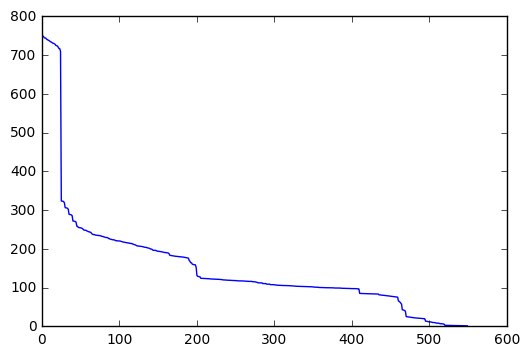

In [37]:
%matplotlib inline  
# We want to rank all attributes, and the best ones will be selected later
selector = SelectKBest(f_regression, #think it's correct to continue using f_regression
                       k="all")#Number of top features to select 
selector.fit(Xtrain, ytrain)
sorted_attributes = np.argsort(-selector.scores_) #from selector extract attributes(arg) and sort per score
sorted_scores = np.sort(-selector.scores_) #from selector extract scores and order them
for index,element in enumerate(zip(sorted_attributes, sorted_scores)):
    print index, element
    if index>40: break

plt.plot(-sorted_scores)
plt.show()        

It seems to me that I could just settle with only the first 24 attributes

In [38]:
# First I try a pipeline with Decision Tree, it should be computed quickly.

print 'With all the 556 input attributes the Decision Tree (with the following best hyper-parameters) had \nMAE = 287.851444341'
print 'Best hyper-parameters were: {max_features: auto, min_samples_split: 5, splitter: random, max_depth: 18, min_samples_leaf: 19}'

np.random.seed(0)

steps = [('feature_selection', SelectKBest(f_regression)),
         ('regression', tree.DecisionTreeRegressor(max_features='auto', min_samples_split=5, splitter='random', min_samples_leaf=19))]

pipe = Pipeline(steps)

param_grid = {'regression__max_depth' : range(10,20,2), 
              'feature_selection__k': range(10,300)}

partitions = [(indicesTrain, indicesVal)]

clf = GridSearchCV(pipe, 
                      param_grid=param_grid,
                      scoring='neg_mean_absolute_error',
                      cv=partitions,
                      n_jobs=-1, verbose=1)
                      

clf.fit(Xava,yava)

print (clf.best_params_ , -clf.best_score_)

With all the 556 input attributes the Decision Tree (with the following best hyper-parameters) had 
MAE = 287.851444341
Best hyper-parameters were: {max_features: auto, min_samples_split: 5, splitter: random, max_depth: 18, min_samples_leaf: 19}
Fitting 1 folds for each of 1450 candidates, totalling 1450 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 out of 1450 | elapsed:  2.0min finished


({'feature_selection__k': 286, 'regression__max_depth': 18}, 287.2905945805207)


In [55]:
print 'The result is really interesting: with just an half of the attributes we obtained a MAE of %s \nwhich is even better than the MAE obtained learning on all the attributes' %(-clf.best_score_)

The result is really interesting: with just an half of the attributes we obtained a MAE of 287.470421855 
which is even better than the MAE obtained learning on all the attributes


__*Note*__: this result appears in this last running of the notebok cells. The previous run yielded a model with k=275 and a MAE slightly higher than the one obtained by training on all the attributes. This could be given by a little modification in the code of the first GridSearchCV for all the DecisionTree hyper-parameters; or just a quenstion of changing random seed between GridSearches. 

In [41]:
print'According to the plot of the previous feature_selection analysis I could probably even reduce the number of \nfeatures without loosing so much accuracy'

np.random.seed(0)

steps = [('feature_selection', SelectKBest(f_regression)),
         ('regression', tree.DecisionTreeRegressor(max_features='auto', min_samples_split=5, splitter='random', min_samples_leaf=19))]

pipe = Pipeline(steps)

param_grid = {'regression__max_depth' : np.arange(10,20,2), 
              'feature_selection__k': np.arange(20,100,2)}

partitions = [(indicesTrain, indicesVal)]

clf = GridSearchCV(pipe, 
                      param_grid=param_grid,
                      scoring='neg_mean_absolute_error',
                      cv=partitions,
                      n_jobs=-1, verbose=1)
                      

clf.fit(Xava,yava)

print (clf.best_params_ , -clf.best_score_)

According to the plot of the previous feature_selection analysis I could probably even reduce the number of 
features without loosing so much accuracy
Fitting 1 folds for each of 200 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.4s


({'feature_selection__k': 88, 'regression__max_depth': 18}, 306.4519587139452)


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   19.1s finished


In [42]:
print 'Setting to 100 the limit for the max number of selectable features, the pipeline yields that taking only %s \nout of the 550 attributes I can fit a decision tree that performs with a MAE = %2d' %(clf.best_params_['feature_selection__k'], -clf.best_score_)

Setting to 100 the limit for the max number of selectable features, the pipeline yields that taking only 88 
out of the 550 attributes I can fit a decision tree that performs with a MAE = 306


In [43]:
print 'I am curious to see the result with RandomForest. To save time I limit the RandomForest hyper-parameters \ntuning; before the best hyper-parameter I obtained for it was n_estimators = 165 this is the reason for inserting \nthat number in the range'

np.random.seed(0)

steps = [('feature_selection', SelectKBest(f_regression)),
         ('regression', RandomForestRegressor())]

pipe = Pipeline(steps)

param_grid = {'regression__n_estimators' : [100,165,199], 
              'feature_selection__k': np.arange(60,100,1)}

partitions = [(indicesTrain, indicesVal)]

clf_rf = GridSearchCV(pipe, 
                      param_grid=param_grid,
                      scoring='neg_mean_absolute_error',
                      cv=partitions,
                      n_jobs=-1, verbose=1)
                      

#clf_rf.fit(Xava,yava)

#print (clf_rf.best_params_ , -clf_rf.best_score_)

I am curious to see the result with RandomForest. To save time I limit the RandomForest hyper-parameters 
tuning; before the best hyper-parameter I obtained for it was n_estimators = 165 this is the reason for inserting 
that number in the range


In [44]:
#print'Not loosing so much accuracy using only %s estimators. \nPreviously the RandomForestRegressor, which I repeat was the best performing, yielded a MAE around 275' %(clf_rf.best_params_['feature_selection__k'])

*Probably by doing a GridSearchCV with this pipeline, and allowing the maximum selecatable number of feature to reach at least half the number of attributes I could obtain a regressor performing almost identically the one fitted an all the attributes. Anyway we're not supposed to use RandomForestRegressor in this section, thus I'll set with the result that the best development is to fit a DecisionTreeRegressor on 275 attributes selected by the feature_selection function.*

#### HOWEVER: Let's see the question about the **Sotavento Location** first.

Currently the dataset contains attributes for meteorological variables in a 5x5 grid, but in principle, only the meteorological variables at Sotavento should be useful. Meteorological variables at other points in the grid should be less relevant.
To check for this hypothesis I could train a model only on the variables at Sotavento location and confront its MAE score with the previous.

In [45]:
sotavento_index = [i for i in data.columns if i[-3:]=='.13']
data_sotavento = data[sotavento_index]
data_sotavento.head()

p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  lai_hv.13  \
0  2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   2.432983   
1  2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   2.432838   
2  2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   2.432704   
3  2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   2.432514   
4  2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   2.432369   

    u10n.13   v10n.13         sp.13     stl1.13    ...         t2m.13  \
0 -0.757587 -1.922799  99846.319914  280.960661    ...     280.473098   
1 -1.412620 -1.403011  99917.733093  279.296651    ...     278.286616   
2 -2.290185 -0.754580  99764.378681  278.233956    ...     277.206490   
3 -3.497855  1.271028  99672.670459  280.787263    ...     280.926600   
4 -0.971249  0.553060  99372.811211  279.583112    ...     277.363875   

      stl2.13     stl3.13   iews.13   inss.13     stl4.13    fsr.13   flsr.13  \
0  281.042026  281.462478 -0.057958 -0.138650  284.684755  0.404731 -5.927092   
1  280.747406  281.486541 -0.103576 -0.083050  284.667948  0.404920 -5.913881   
2  280.114863  281.487095 -0.165721 -0.036241  284.651914  0.405704 -5.908272   
3  279.991138  281.472435 -0.275550  0.098192  284.636266  0.403967 -5.961995   
4  280.576898  281.473265 -0.056553  0.041844  284.620232  0.403808 -5.987860   

    u100.13   v100.13  
0 -1.780562 -4.443617  
1 -3.743344 -3.129469  
2 -5.097203 -1.157748  
3 -4.500835  1.502478  
4 -3.392324  2.131114  

[5 rows x 22 columns]

In [46]:
Xava_sot = data_sotavento.as_matrix()


In [47]:
np.random.seed(0);

param_grid = {'splitter' : ('best', 'random'),
             'max_features' : ('log2', 'sqrt', 'auto'),
             'max_depth' : range(1,20,1),
             'min_samples_split' : range(2,10,1),
             'min_samples_leaf' : range(1,20,1)}

partitions_sot = [(indicesTrain, indicesVal)]

clf = GridSearchCV(tree.DecisionTreeRegressor(),
                  param_grid=param_grid,
                  scoring='neg_mean_absolute_error',
                  cv=partitions_sot,
                  n_jobs=-1, verbose=1)

clf.fit(Xava_sot,yava)

print (clf.best_params_, -clf.best_score_)

Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 12160 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 17328 out of 17328 | elapsed:  1.3min finished


({'max_features': 'auto', 'min_samples_split': 9, 'splitter': 'random', 'max_depth': 19, 'min_samples_leaf': 18}, 287.4704218549202)


Training a Decision Tree just on the the attributes in Sotavento Location yields predictions with a MAE almost identical to what we would have by training on the whole dataset. 
It seems to be that attributes at Sotavento are **all we need**.

**But** in that case, using a pipeline for selecting only the best 22 attributes and fit a Decision Tree, should yield the same. Moreover the previous GridSearches should have indicate k=22 as best hyper-parameter.

In [48]:
np.random.seed(0);

steps = [('feature_selection', SelectKBest(f_regression, k=22)),
         ('regression', tree.DecisionTreeRegressor(min_samples_split=clf.best_params_['min_samples_split'],
                                                  splitter=clf.best_params_['splitter'],
                                                  max_depth=clf.best_params_['max_depth'],
                                                  min_samples_leaf=clf.best_params_['min_samples_leaf']))];

pipe = Pipeline(steps);

yval_pred = pipe.fit(Xtrain, ytrain).predict(Xval)

print 'MAE = %s' %(mae(yval_pred, yval))

MAE = 486.883421166


It's not exactly the MAE I expected. Let's try without the pipeline.

In [49]:
np.random.seed(0)

sel = SelectKBest(f_regression, k=22) 
Xtrain22 = sel.fit(Xtrain, ytrain).transform(Xtrain)

treeR = tree.DecisionTreeRegressor(min_samples_split=clf.best_params_['min_samples_split'],
                                                  splitter=clf.best_params_['splitter'],
                                                  max_depth=clf.best_params_['max_depth'],
                                                  min_samples_leaf=clf.best_params_['min_samples_leaf'])

treeR.fit(Xtrain22, ytrain)

Xval22= sel.transform(Xval)
yval_pred = treeR.predict(Xval22)
#print Xtrain.shape; print Xtrain22.shape
print 'MAE = %s' %(mae(yval_pred, yval))

MAE = 486.883421166


The same. May be there is some problem with *the selector*. Let's try to see **if** the Sotavento attributes are between the ones selected.

In [50]:
c=[]
for i in np.arange(0,549):
    if sel.get_support()[i]==True:
        c.append(i)
print(c)

[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97]


Let's see to which columns do that correspond in the **original data**.

In [51]:
data[c].head()

cape.20    cape.21    cape.22    cape.23    cape.24    cape.25  \
0  13.868609  13.034977  13.186546  13.300223  13.413900  13.527577   
1   9.965694   3.789237   5.304932   6.782735   8.298430   9.814125   
2   6.858520   2.576681   3.637668   4.660762   5.721748   6.744843   
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

      p59.162.1     p59.162.2     p59.162.3     p59.162.4      ...       \
0  1.400898e+06  1.405015e+06  1.408953e+06  1.413070e+06      ...        
1  1.167130e+06  1.171426e+06  1.175722e+06  1.180018e+06      ...        
2  1.113252e+06  1.114147e+06  1.115042e+06  1.115758e+06      ...        
3  1.090699e+06  1.090878e+06  1.091057e+06  1.091236e+06      ...        
4  1.093563e+06  1.089625e+06  1.085687e+06  1.081749e+06      ...        

      p59.162.7     p59.162.8     p59.162.9    p59.162.10    p59.162.11  \
0  1.393023e+06  1.396603e+06  1.400362e+06  1.403941e+06  1.380314e+06   
1  1.159433e+06  1.163371e+06  1.167130e+06  1.171068e+06  1.146367e+06   
2  1.105377e+06  1.105913e+06  1.106450e+06  1.106987e+06  1.098038e+06   
3  1.082644e+06  1.082644e+06  1.082823e+06  1.082823e+06  1.076200e+06   
4  1.081391e+06  1.077453e+06  1.073515e+06  1.069577e+06  1.078885e+06   

     p59.162.12    p59.162.13    p59.162.15    p59.162.16    p59.162.17  
0  1.383536e+06  1.386937e+06  1.393560e+06  1.372796e+06  1.375839e+06  
1  1.149946e+06  1.153526e+06  1.160507e+06  1.139028e+06  1.142250e+06  
2  1.098396e+06  1.098754e+06  1.099470e+06  1.092489e+06  1.092668e+06  
3  1.076200e+06  1.076021e+06  1.076021e+06  1.071009e+06  1.070830e+06  
4  1.074947e+06  1.070830e+06  1.062955e+06  1.073515e+06  1.069577e+06  

[5 rows x 22 columns]

**Well**, the attribute selection function hadn't selected neither every, nor only those attributes containing data in Sotavento location.

I could try a PCA but, as I show at the end of the notebook, there's still the problem to choose how many principal components to finally pick for the regression.


### Finally...

The model I would choose is that one arising from the GridSearchCV performed on the first pipeline:
({'feature_selection_ k': 286, 'regression_ max_depth': 18}, 287.2905945805207)

- k= little more than half the total number of attributes
- a MAE really close to the one obtained fitting the Decision Tree on all the attributes

In [59]:
#I create a new training fold (basically merging the data which before were splitted in train and val)
np.random.seed(0)

new_index_train = (np.where(data.year<2009))[0]
new_Xtrain = ava[new_index_train,6:]
new_ytrain = ava[new_index_train,0]

steps = [('feature_selection', SelectKBest(f_regression, k=286)),
         ('regression', tree.DecisionTreeRegressor(max_depth=18,
                                                   max_features='auto', min_samples_split=5, 
                                                   splitter='random', min_samples_leaf=19))]

finalpipe = Pipeline(steps)

ytest_pred = finalpipe.fit(new_Xtrain , new_ytrain).predict(Xtest)

print 'Evaluating the model on the test dataset I obtain a mean absolut error of %s' %(mae(ytest_pred,ytest))

Evaluating the model on the test dataset I obtain a mean absolut error of 310.558807058


### Appendix

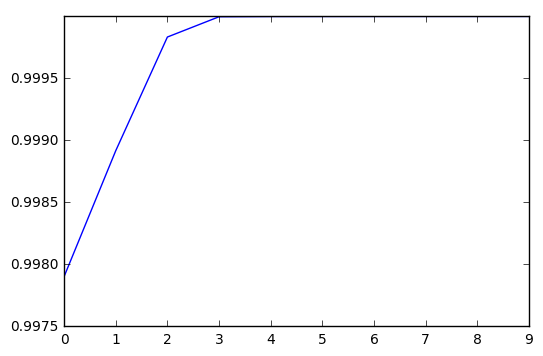

In [53]:
########################################
################PCA#####################
########################################

from sklearn.decomposition import PCA

pca=PCA(n_components=10)


###############################################################################
# Plot the PCA spectrum
pca.fit(Xtrain)

accumulated_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(accumulated_variance)
plt.show()

In [54]:
# I perform a randomized search with PCA

np.random.seed(0)

steps = [('PCA', PCA()),('regression', tree.DecisionTreeRegressor(max_features='auto', min_samples_split=5, splitter='random', min_samples_leaf=19))]

pipe = Pipeline(steps)

param_dist = {'PCA__n_components' : np.arange(1,30), 
              'regression__max_depth': np.arange(2,20,2)}

n_iter_search = 15

partitions = [(indicesTrain, indicesVal)]

clf_rs = RandomizedSearchCV(pipe, 
                      param_dist,
                      scoring='neg_mean_absolute_error',
                      cv=partitions,
                      n_jobs=-1, verbose=1)
                      

clf_rs.fit(Xava,yava)

print (clf_rs.best_params_ , -clf_rs.best_score_)

Fitting 1 folds for each of 10 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


({'PCA__n_components': 27, 'regression__max_depth': 12}, 461.94661640331293)
